# Preparation 

## Drive

In [ ]:
from google.colab import drive
# 4/vAFKK2XMqhFnE1xT-qBasfw57ybPZ0tPSdrKKA5CYUcvl9NlLtBXVoE
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/recsys/buyer_classification/')

## Load data

In [ ]:
import pandas as pd

data = pd.read_csv("sample.csv")
data = data[list(data)[1:]]
data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,session_id,timestamp,item_id,category,hour,month,weekday,day,week,dwelltime,item_rank,label
0,3,2014-04-02 13:17:46.940000+00:00,214716935,0,13,4,2,2,14,0.0,455.0,False
1,3,2014-04-02 13:26:02.515000+00:00,214774687,0,13,4,2,2,14,495.0,48.0,False
2,3,2014-04-02 13:30:12.318000+00:00,214832672,0,13,4,2,2,14,249.0,43.0,False
3,13,2014-04-06 14:50:13.638000+00:00,214836761,0,14,4,6,6,14,0.0,35.0,False
4,13,2014-04-06 14:52:54.363000+00:00,214684513,0,14,4,6,6,14,160.0,621.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3136553,11299813,2014-09-24 16:24:42.314000+00:00,214839347,1,16,9,2,24,39,174.0,126.0,False
3136554,11299813,2014-09-24 16:30:40.442000+00:00,214835000,S,16,9,2,24,39,358.0,879.0,False
3136555,11299813,2014-09-24 16:34:32.102000+00:00,214828970,S,16,9,2,24,39,231.0,547.0,False
3136556,11299813,2014-09-24 16:34:57.172000+00:00,214828970,S,16,9,2,24,39,25.0,547.0,False


In [ ]:
data.describe()

,session_id,item_id,hour,month,weekday,day,week,gsize,dwelltime,item_rank
count,5.000000e+05,5.000000e+05,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,5.623946e+06,2.168000e+08,13.427054,6.489130,3.14083,15.656988,26.623400,1.100880,1951.624206,339.006214
std,3.359718e+06,2.958706e+07,5.079083,1.743043,2.18782,8.586408,7.712633,0.358859,12731.189134,880.222323
min,2.000000e+00,2.145072e+08,0.000000,4.000000,0.00000,1.000000,14.000000,1.000000,0.000000,-1.000000
25%,2.685282e+06,2.146761e+08,9.000000,5.000000,1.00000,9.000000,20.000000,1.000000,0.000000,7.000000
50%,5.524375e+06,2.148268e+08,14.000000,6.000000,3.00000,15.000000,27.000000,1.000000,0.000000,52.000000
75%,8.535938e+06,2.148454e+08,18.000000,8.000000,5.00000,23.000000,34.000000,1.000000,0.000000,270.000000
max,1.156212e+07,1.178825e+09,23.000000,9.000000,6.00000,31.000000,40.000000,8.000000,86399.000000,10226.000000


In [ ]:
db = pd.read_csv("purchased_items.csv")
db = db[list(db)[1:]]
db

,session_id,timestamp,item_id,price,quantity
0,420374,2014-04-06T18:44:58.314Z,214537888,12462,1
1,420374,2014-04-06T18:44:58.325Z,214537850,10471,1
2,281626,2014-04-06T09:40:13.032Z,214535653,1883,1
3,420368,2014-04-04T06:13:28.848Z,214530572,6073,1
4,420368,2014-04-04T06:13:28.858Z,214835025,2617,1
...,...,...,...,...,...
540718,11368701,2014-09-26T07:52:51.357Z,214849809,554,2
540719,11368691,2014-09-25T09:37:44.206Z,214700002,6806,5
540720,11523941,2014-09-25T06:14:47.965Z,214578011,14556,1
540721,11423202,2014-09-26T18:49:34.024Z,214849164,1046,1


# EXPLORATORY DATA ANALYSIS


## How many buyer-sessions (sessions that end with purchased items) and non-buyer sessions (sessions without any purchase)?

In [ ]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%.2lf%%' % (round(height,3)*100),
                ha='center', va='bottom')
counts.columns = ['label','percentage']


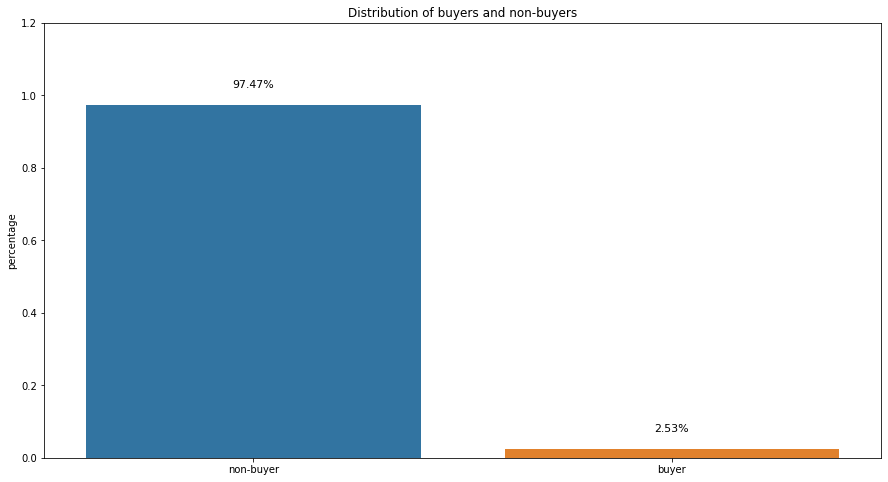

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sessions_labels = data[['session_id','label']]\
  .drop_duplicates()

counts = sessions_labels\
  .label\
  .value_counts(normalize=True)\
  .reset_index()

fig, ax = plt.subplots()

fig.set_size_inches(15, 8)
ax = sns.barplot(x=['non-buyer','buyer'], y='percentage', data=counts)

plt.title("Distribution of buyers and non-buyers")
for p in ax.patches:
          ax.annotate("%.2f%%" % (p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
              textcoords='offset points')
_ = ax.set_ylim(0,1.2) #To make space for the annotations
plt.show()

## How sessions length is distributed?

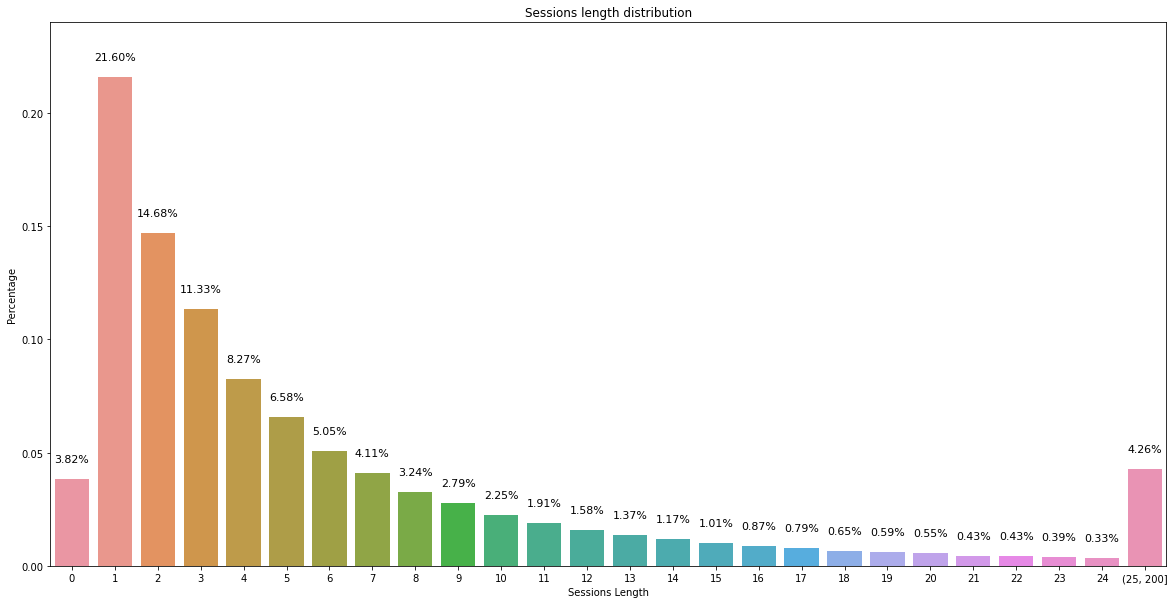

In [ ]:
import seaborn as sns

grp_sizes = data.set_index('session_id').groupby('session_id')\
    .label.transform('size').to_frame(name='sizes').sizes.value_counts()

# grp_sizes.sizes.value_counts().plot.bar(figsize=(10,20))
limit = 25
grp_sizes = grp_sizes.reset_index()
grp_sizes.columns = ['sizes','counts']

first_range = list(range(grp_sizes.sizes.min()-1,limit))
second_range = [limit, grp_sizes.sizes.max()]
grp_sizes['srange'] = pd.cut(grp_sizes.sizes,first_range + second_range)

def srange_str(x):
  if x.left in first_range:
    idx = first_range.index(x.left)
    return first_range[idx]
  else:
    return x
  return x

grp_sizes['srange'] = grp_sizes.srange.apply(srange_str)
total_sizes = grp_sizes.counts.sum()
grp_sizes = grp_sizes.groupby("srange")\
        .counts.apply(lambda x: sum(x)/total_sizes).reset_index()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(grp_sizes.srange.astype(str),grp_sizes.counts)

for p in ax.patches:
          ax.annotate("%.2f%%" % (p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
              textcoords='offset points')
_ = ax.set_ylim(0,0.24) #To make space for the annotations
plt.xlabel("Sessions Length")
plt.ylabel("Percentage")
plt.title("Sessions length distribution") # You can comment this line out if you don't need title
plt.show()

## How the sessions length affects buying rate?


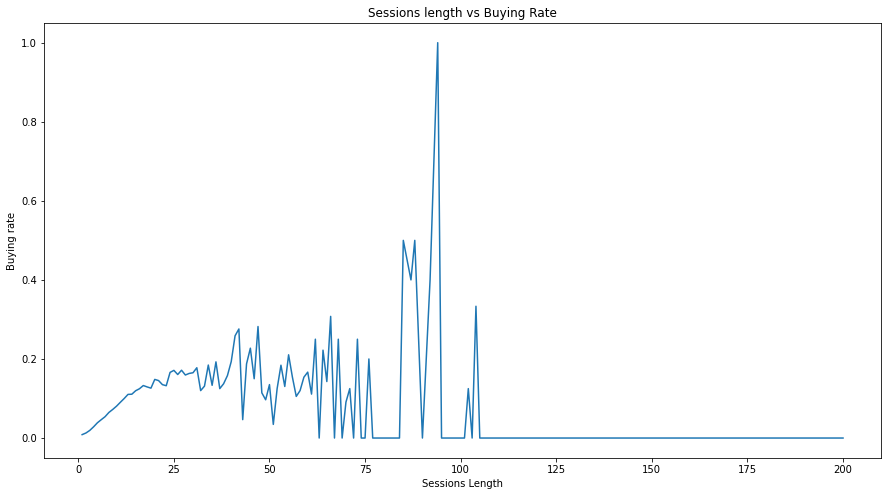

In [ ]:
import pandas as pd
# mean
df = data

grp_sizes = df.groupby('session_id',as_index=False).agg({'label': ['size', 'mean']})
grp_sizes.columns = ['session_id','grp_size','buying_rate']
grp_sizes = grp_sizes.groupby('grp_size')['buying_rate'].mean().reset_index()
# print("Total lengths with less than < 100", size_count[size_count.counts < 100].count())
# ax = grp_sizes.sort_values('grp_size').plot(x='grp_size',y='buying_rate',figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
fig.set_size_inches(15, 8)
ax = sns.lineplot(x='grp_size',y='buying_rate',data=grp_sizes)
plt.xlabel("Sessions Length")
plt.ylabel("Buying rate")
plt.title("Sessions length vs Buying Rate") 
plt.show()

## How much a time data affect the buying rate? 

### Hour x Buying rate



In [ ]:
import pandas as pd

def plot_group_time(df,timetype):
  grp_sizes = df[['session_id',timetype,'label']].groupby([timetype])
  grp_sizes = grp_sizes.label.mean()
  plt.xlabel(timetype)
  plt.ylabel("Buying rate")
  plt.title(timetype + " vs Buying rate") 
  ax = grp_sizes.plot(figsize=(10,8),style='.-')
  ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
  ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
  plt.show()

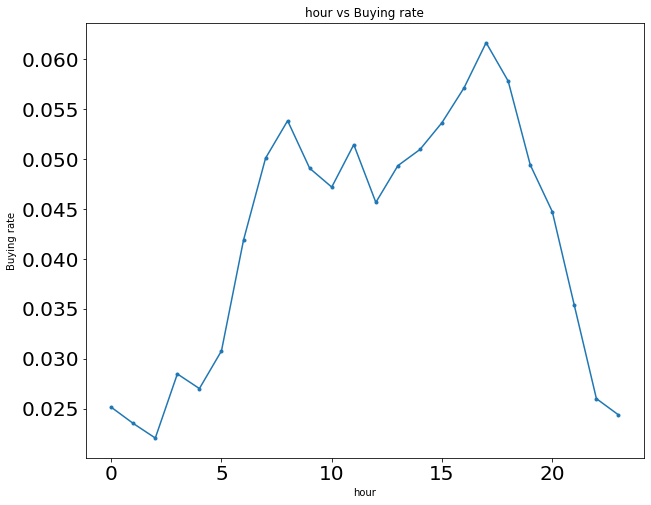

In [ ]:
plot_group_time(data,'hour')

### Month vs Buying rate


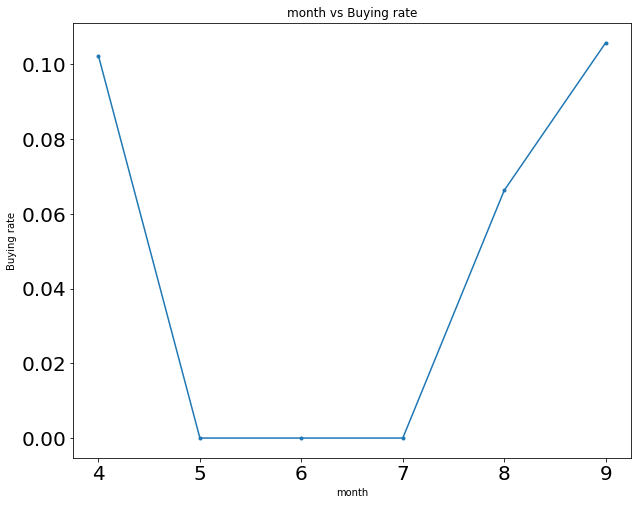

In [ ]:
plot_group_time(data,'month')

### Weekday vs Buying rate


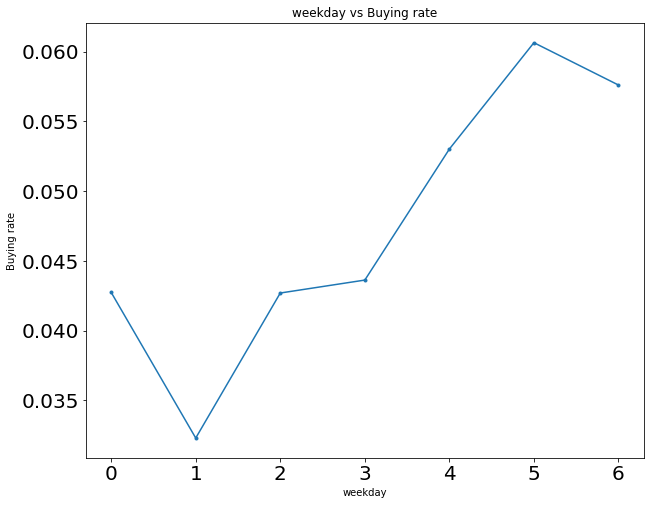

In [ ]:
plot_group_time(data,'weekday')

### Day vs Buying rate

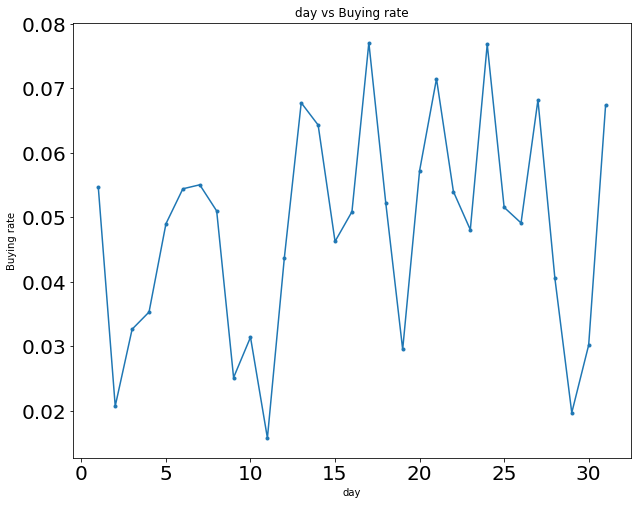

In [ ]:
plot_group_time(data,'day')

## How does the time between sessions affect (dwelltime) purchasing intention? 

In [ ]:
data = data.drop('dwelltime_cat',axis=1)
data

,session_id,timestamp,item_id,category,hour,month,weekday,day,week,dwelltime,item_rank,label
0,3,2014-04-02 13:17:46.940000+00:00,214716935,0,13,4,2,2,14,0.0,455.0,False
1,3,2014-04-02 13:26:02.515000+00:00,214774687,0,13,4,2,2,14,495.0,48.0,False
2,3,2014-04-02 13:30:12.318000+00:00,214832672,0,13,4,2,2,14,249.0,43.0,False
3,13,2014-04-06 14:50:13.638000+00:00,214836761,0,14,4,6,6,14,0.0,35.0,False
4,13,2014-04-06 14:52:54.363000+00:00,214684513,0,14,4,6,6,14,160.0,621.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3136553,11299813,2014-09-24 16:24:42.314000+00:00,214839347,1,16,9,2,24,39,174.0,126.0,False
3136554,11299813,2014-09-24 16:30:40.442000+00:00,214835000,S,16,9,2,24,39,358.0,879.0,False
3136555,11299813,2014-09-24 16:34:32.102000+00:00,214828970,S,16,9,2,24,39,231.0,547.0,False
3136556,11299813,2014-09-24 16:34:57.172000+00:00,214828970,S,16,9,2,24,39,25.0,547.0,False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def plot_group_numeric(df,timetype, amount=10,figsize=(50,20)):
  maxi = df[timetype].max() + 1
  df[timetype + "_cat"] = pd.cut(df[timetype], range(0, int(maxi), amount))
  grp_sizes = df[['session_id',timetype + "_cat",'label']].groupby([timetype + "_cat"])
  grp_sizes = grp_sizes.label.mean().reset_index()
  df = df.drop(timetype + "_cat",axis=1)
  plt.figure(figsize=figsize)
  plt.xlabel("Dwelltime (grouped-by-range)")
  plt.ylabel("Buying rate")
  plt.title("Dwelltime vs Buying rate")
  grp_sizes.dwelltime_cat = grp_sizes.dwelltime_cat.astype(str)

  plt.xticks(rotation='vertical')
  ax = plt.plot(grp_sizes.dwelltime_cat,grp_sizes.label)


In [ ]:
df.dwelltime.describe()

count    3.136558e+06
mean     1.064688e+02
std      2.841225e+02
min      0.000000e+00
25%      0.000000e+00
50%      3.200000e+01
75%      9.100000e+01
max      3.599000e+03
Name: dwelltime, dtype: float64

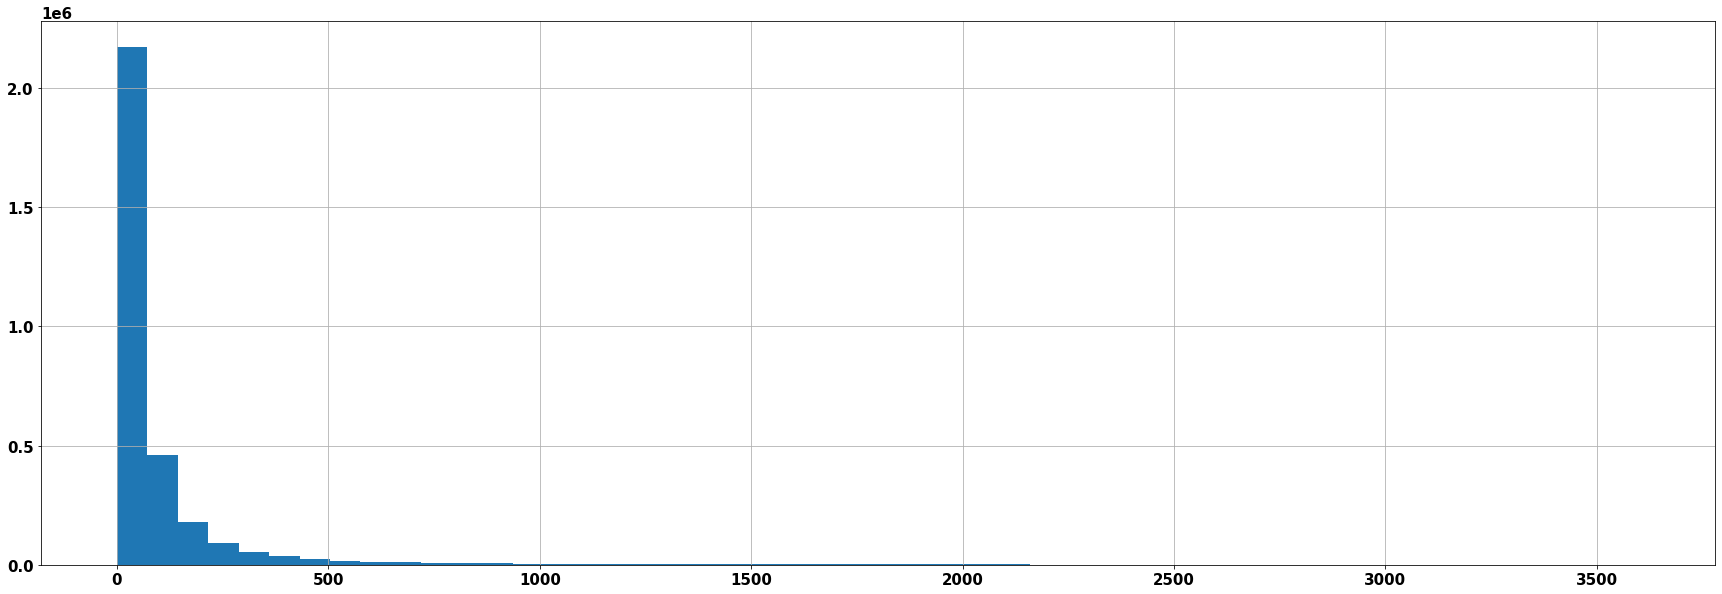

In [ ]:
data.dwelltime.hist(bins=50,figsize=(30,10))

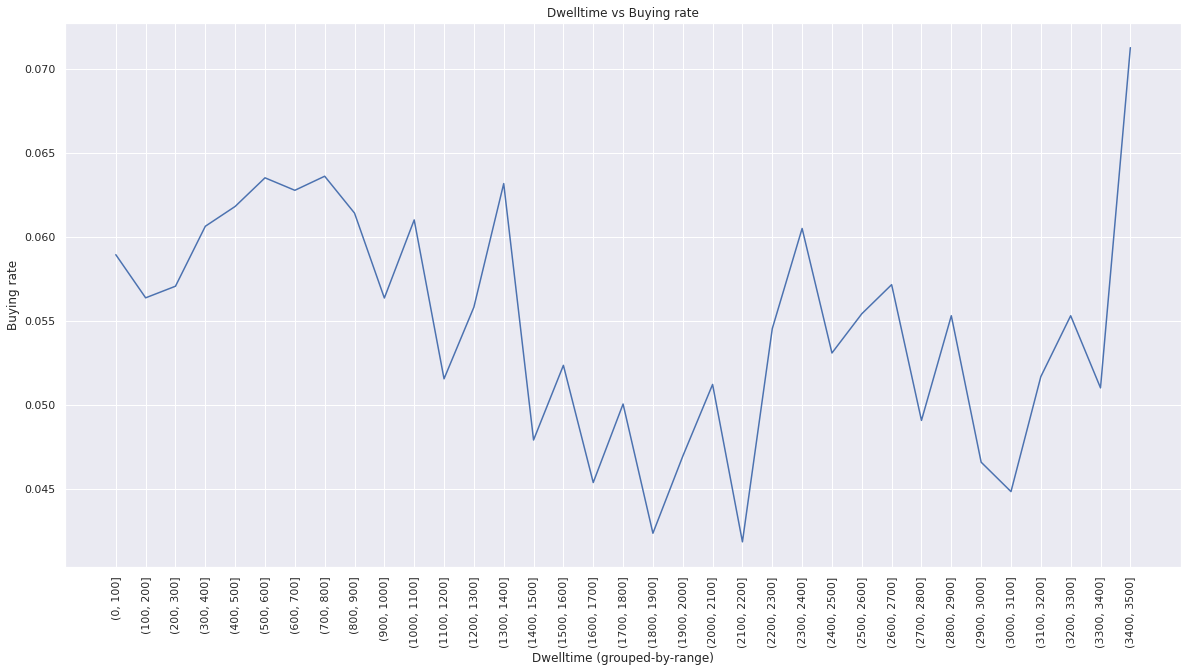

In [ ]:
plot_group_numeric(data,'dwelltime',100,(20,10))

## How does the number of clicks per item affect the purchase rate

In [ ]:
import operator, itertools
from decimal import *
import numpy as np
from collections import defaultdict

# valid_db = db[db.session_id.isin(valid_df.session_id)]
sid_item = list(zip(db.session_id,db.item_id))

d = defaultdict(list)

for sid, item_id in sid_item:
    d[sid].append(item_id)

valid_buyers = d
d = dict()
item_id_qt = list(zip(db.item_id,db.quantity))
for item_id, qt in item_id_qt:
    if item_id not in d:
      d[item_id] = 0
    d[item_id] = d[item_id] + qt

item_id_quant = d
item_id_quant

{214537888: 17,
 214537850: 9,
 214535653: 46,
 214530572: 17,
 214835025: 24,
 214668193: 48,
 214587399: 74,
 214586690: 20,
 214774667: 57,
 214578823: 25,
 214821371: 179,
 214717867: 487,
 214826955: 1146,
 214826715: 576,
 214827026: 265,
 214716984: 1227,
 214716932: 826,
 214821017: 106,
 214821020: 285,
 214821013: 59,
 214821290: 3840,
 214548744: 55,
 214838503: 198,
 214636775: 12,
 214820255: 158,
 214834865: 428,
 214706441: 106,
 214820225: 11,
 214821339: 1164,
 214586711: 610,
 214821285: 1319,
 214821277: 8490,
 214826608: 800,
 214711635: 22,
 214573612: 31,
 214695097: 21,
 214695092: 8,
 214716930: 771,
 214820231: 1466,
 214840417: 83,
 214839313: 1783,
 214687642: 134,
 214585395: 226,
 214547668: 14,
 214652220: 82,
 214840483: 671,
 214743369: 28,
 214826837: 400,
 214820392: 444,
 214826908: 406,
 214819430: 203,
 214826810: 659,
 214821390: 118,
 214586651: 1,
 214717005: 736,
 214748293: 320,
 214652932: 38,
 214718396: 217,
 214582942: 675,
 214717888: 447,

In [ ]:
counts = pd.DataFrame(data['item_id'].value_counts()).reset_index()
counts.columns = ['item_id','count_items']
counts['count_range'] = pd.cut(counts.count_items, range(0, counts.count_items.max() + 10, 1000))
counts['bought_items'] = counts.item_id.map(item_id_quant).fillna(0.0)

counts = counts.groupby('count_range').agg({'bought_items': 'sum'})
counts = counts[counts.bought_items != 0]

counts = counts.reset_index()
total = counts.bought_items.sum()
counts['bought_items'] = counts['bought_items'].apply(lambda x: x/total)
counts['count_range'] = counts.count_range.astype(str)
counts

,count_range,bought_items
0,"(0, 1000]",0.526053
1,"(1000, 2000]",0.245486
2,"(2000, 3000]",0.101646
3,"(3000, 4000]",0.048325
4,"(4000, 5000]",0.038602
5,"(5000, 6000]",0.013953
6,"(6000, 7000]",0.006292
7,"(7000, 8000]",0.013775
8,"(10000, 11000]",0.001035
9,"(11000, 12000]",0.004835


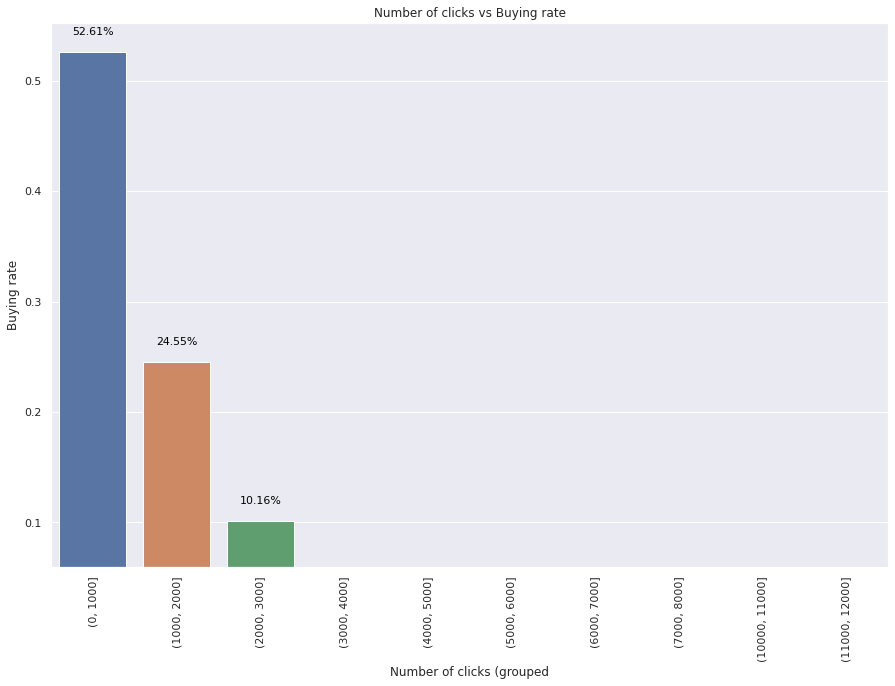

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
sns.barplot(counts.count_range, counts.bought_items)
plt.setp(ax.get_xticklabels(), rotation=90)

plt.xlabel("Number of clicks (grouped")
plt.ylabel("Buying rate")
plt.title("Number of clicks vs Buying rate")

ax.set_ylim(0.06)

for p in ax.patches:
      ax.annotate("%.2f%%" % (p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
      textcoords='offset points')

## How does the quantity of purchases per item (item rank) affect the purchase rate?

In [ ]:
buyers.item_rank

NameError: ignored

In [ ]:
import operator, itertools
from decimal import *
import numpy as np
from collections import defaultdict

sid_item = list(zip(db.session_id,db.item_id))

d = defaultdict(list)

for sid, item_id in sid_item:
    d[sid].append(item_id)

d = dict()
item_id_qt = list(zip(db.item_id,db.quantity))
for item_id, qt in item_id_qt:
    if item_id not in d:
      d[item_id] = 0
    d[item_id] = d[item_id] + qt

item_id_quant = d
# item_id_quant

In [ ]:
buyers_it_rank = dict(data[['item_id','item_rank']].values)
# buyers_it_rank

In [ ]:
item_rank_prob = []

i = 0
for it_buyers,rank_buyer in buyers_it_rank.items():
  if it_buyers in item_id_quant:
    prob = item_id_quant[it_buyers]/len(item_id_quant)
    item_rank_prob.append((rank_buyer, prob))
  else:
    item_rank_prob.append((rank_buyer, 0))
  i+=1

item_rank_prob = sorted(item_rank_prob)


In [ ]:
avg_rank_prob = dict()

for rank,prob in item_rank_prob:
  if rank not in avg_rank_prob:
    avg_rank_prob[rank] = prob
  else:
    avg_rank_prob[rank] += prob/2

# avg_rank_prob

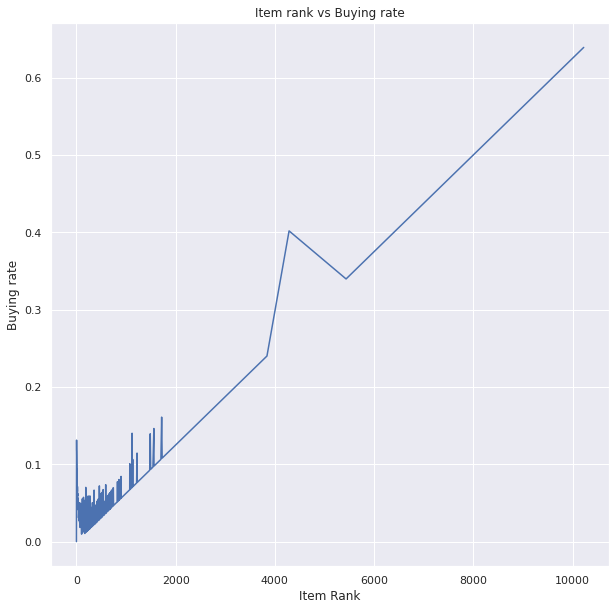

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

ls = list(avg_rank_prob.items())
plt.xlabel("Item Rank")
plt.ylabel("Buying rate")
plt.title("Item rank vs Buying rate")
sns.lineplot(*zip(*ls))


## Detecting Outliers

In [ ]:
data['grp_length'] = data.groupby('session_id').label.transform('size')
data.head(4)

,session_id,timestamp,item_id,category,hour,month,weekday,day,week,dwelltime,item_rank,label,dwelltime_cat,grp_length
0,3,2014-04-02 13:17:46.940000+00:00,214716935,0,13,4,2,2,14,0.0,455.0,False,NaN,3
1,3,2014-04-02 13:26:02.515000+00:00,214774687,0,13,4,2,2,14,495.0,48.0,False,"(400.0, 500.0]",3
2,3,2014-04-02 13:30:12.318000+00:00,214832672,0,13,4,2,2,14,249.0,43.0,False,"(200.0, 300.0]",3
3,13,2014-04-06 14:50:13.638000+00:00,214836761,0,14,4,6,6,14,0.0,35.0,False,NaN,3


### With Visualization

#### Box-plot

In [ ]:
np.log2(data.dwelltime)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


0              -inf
1          8.951285
2          7.960002
3              -inf
4          7.321928
             ...   
3136553    7.442943
3136554    8.483816
3136555    7.851749
3136556    4.643856
3136557    5.930737
Name: dwelltime, Length: 3136558, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


1          2.694605
2          2.396199
4          2.204120
5          1.361728
7          2.123852
             ...   
3136553    2.240549
3136554    2.553883
3136555    2.363612
3136556    1.397940
3136557    1.785330
Name: dwelltime, Length: 2225362, dtype: float64


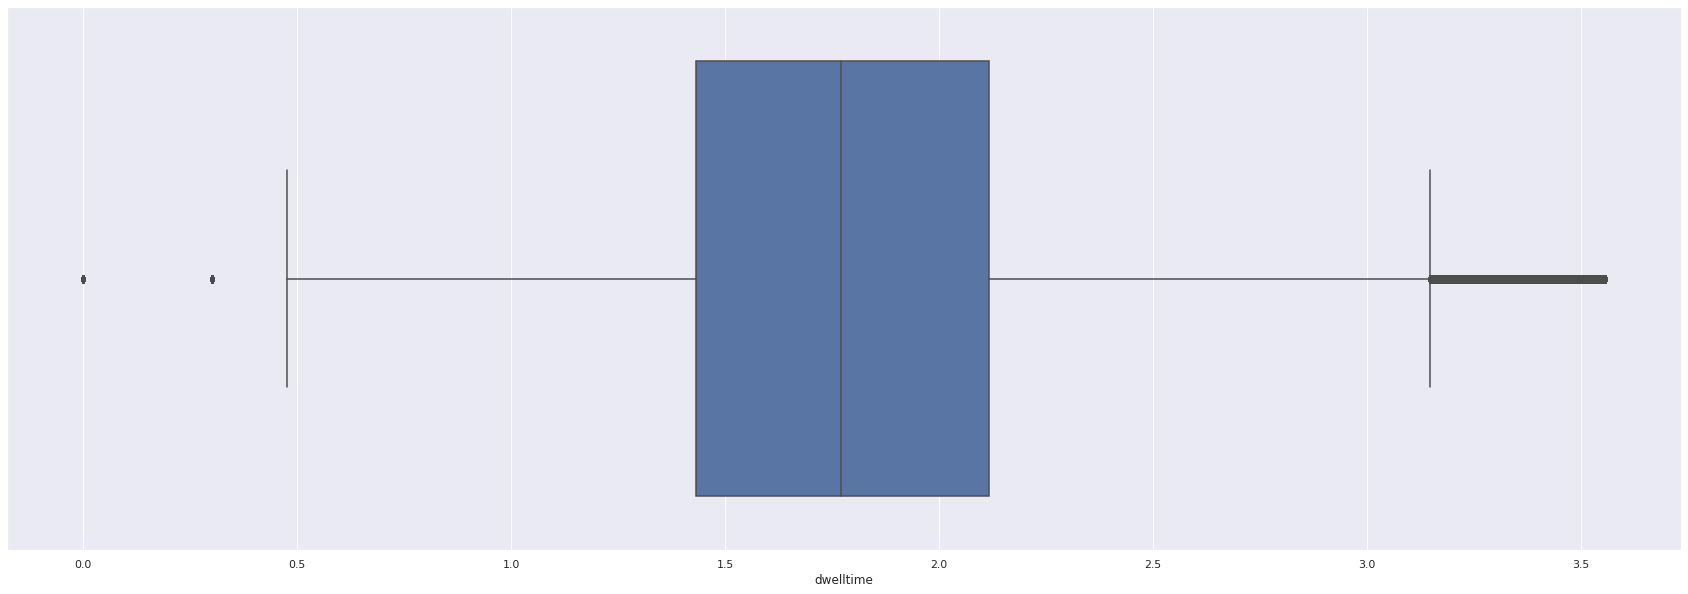

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(30,10)})

aux = np.log10(data.dwelltime)
aux = aux[~aux.isin([np.nan, np.inf, -np.inf])]
print(aux)
ax = sns.boxplot(x=aux)
# ax.set(xscale="log")

#### Pair-plot

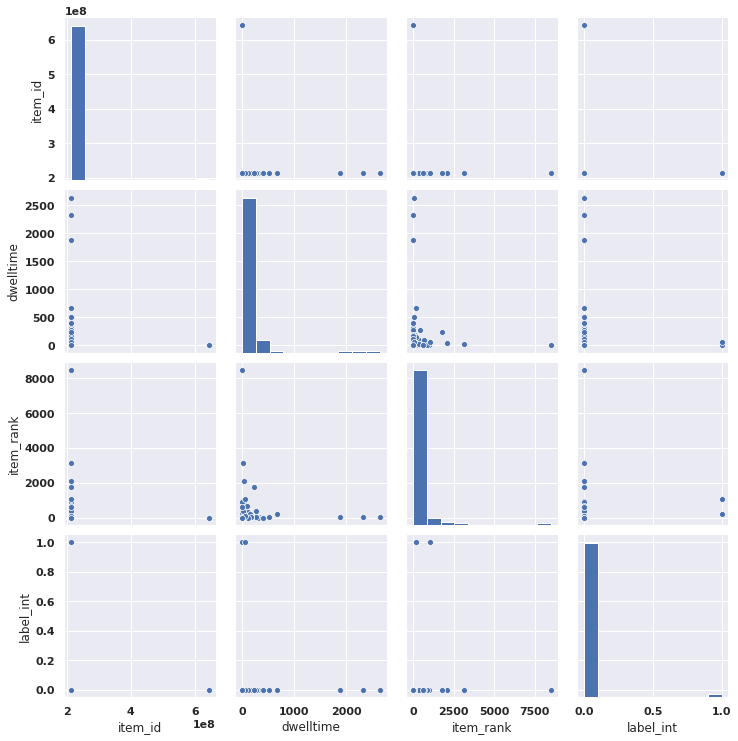

In [ ]:
data['label_int'] = data.label.astype(int)

sns.pairplot(data[['item_id','category','dwelltime','item_rank','label_int']].sample(100))

data = data.drop('label_int',axis=1)

### Mathematically

#### Z-score

In [ ]:
data.head(3)

,session_id,timestamp,item_id,category,hour,month,weekday,day,week,dwelltime,item_rank,label,dwelltime_cat
0,3,2014-04-02 13:17:46.940000+00:00,214716935,0,13,4,2,2,14,0.0,455.0,False,NaN
1,3,2014-04-02 13:26:02.515000+00:00,214774687,0,13,4,2,2,14,495.0,48.0,False,"(400.0, 500.0]"
2,3,2014-04-02 13:30:12.318000+00:00,214832672,0,13,4,2,2,14,249.0,43.0,False,"(200.0, 300.0]"


In [ ]:
from scipy import stats
import numpy as np

data['z_score_dwelltime']=stats.zscore(data['dwelltime'])
data.head(2)

,session_id,timestamp,item_id,category,hour,month,weekday,day,week,dwelltime,item_rank,label,dwelltime_cat,grp_length,z_score_dwelltime
0,3,2014-04-02 13:17:46.940000+00:00,214716935,0,13,4,2,2,14,0.0,455.0,False,NaN,3,-0.374728
1,3,2014-04-02 13:26:02.515000+00:00,214774687,0,13,4,2,2,14,495.0,48.0,False,"(400.0, 500.0]",3,1.367478


In [ ]:
data['z_outlier'] = (data['z_score_dwelltime'].abs()>3)
data.head(2)

,session_id,timestamp,item_id,category,hour,month,weekday,day,week,dwelltime,item_rank,label,dwelltime_cat,grp_length,z_score_dwelltime,z_outlier
0,3,2014-04-02 13:17:46.940000+00:00,214716935,0,13,4,2,2,14,0.0,455.0,False,NaN,3,-0.374728,False
1,3,2014-04-02 13:26:02.515000+00:00,214774687,0,13,4,2,2,14,495.0,48.0,False,"(400.0, 500.0]",3,1.367478,False


AttributeError: ignored

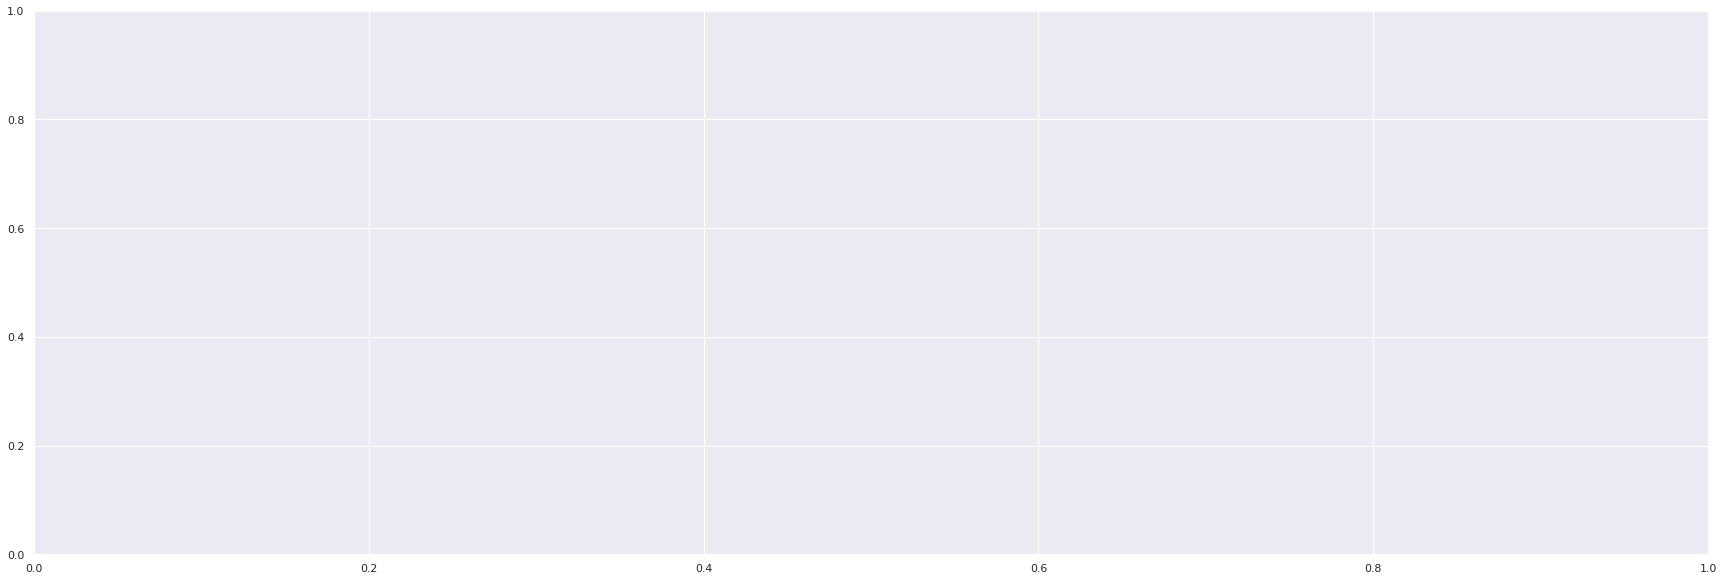

In [ ]:
counts = data\
  .z_outlier\
  .value_counts(normalize=True)\
  .reset_index()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2lf%%' % (round(height,3)*100),
                ha='center', va='bottom')

counts.columns = ['label','percentage']
fig, ax = plt.subplots()
rects = sns.bar(counts.label,counts.percentage)

ax.set_ylim(0.0,1.2)

autolabel(rects)

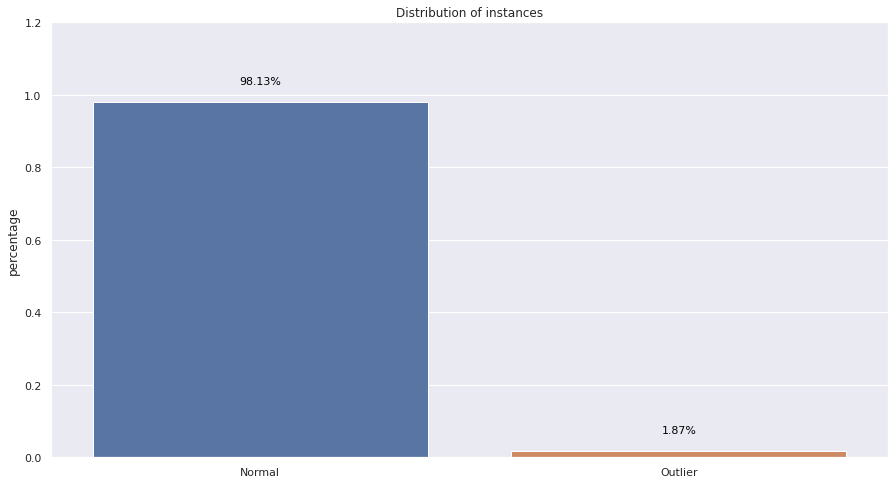

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = data\
  .z_outlier\
  .value_counts(normalize=True)\
  .reset_index()

fig, ax = plt.subplots()

fig.set_size_inches(15, 8)

counts.columns = ['label','percentage']
ax = sns.barplot(x=['Normal','Outlier'], y='percentage', data=counts)

plt.title("Distribution of instances")
for p in ax.patches:
          ax.annotate("%.2f%%" % (p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
              textcoords='offset points')
_ = ax.set_ylim(0,1.2) #To make space for the annotations
plt.show()

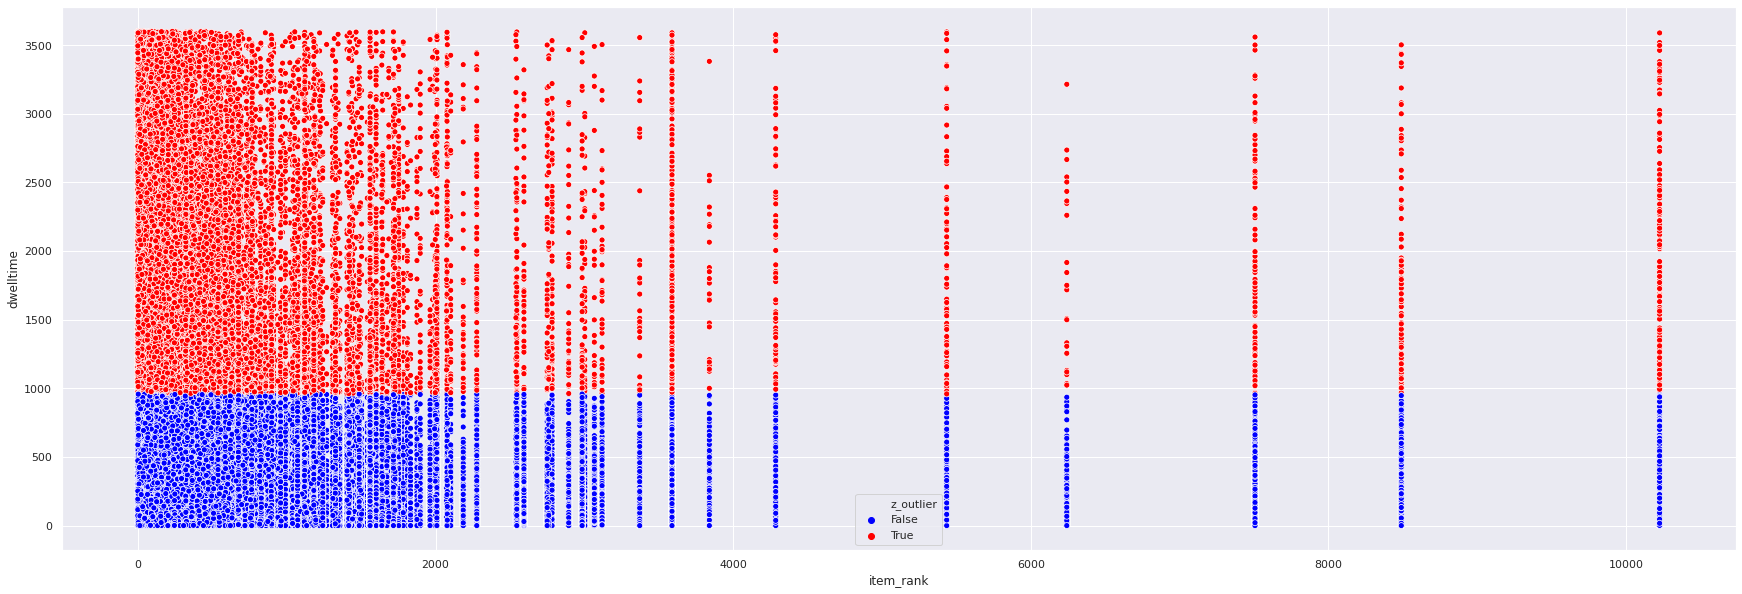

In [ ]:
import seaborn as sns

aux = data
sns.scatterplot(x='item_rank', y='dwelltime', hue="z_outlier",
              data=aux, palette=['blue','red'],
                   legend='full')

# g.set(xscale="log")

#### Inter Quartile Range (IQR)

In [ ]:
data.shape

(3136558, 14)

In [ ]:
import numpy as np
Q1 = np.quantile(data.dwelltime,0.25)
Q3 = np.quantile(data.dwelltime,0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

0.0 91.0 91.0


In [ ]:
data['iqr_outlier'] = (data.dwelltime > (Q3+1.5*IQR))

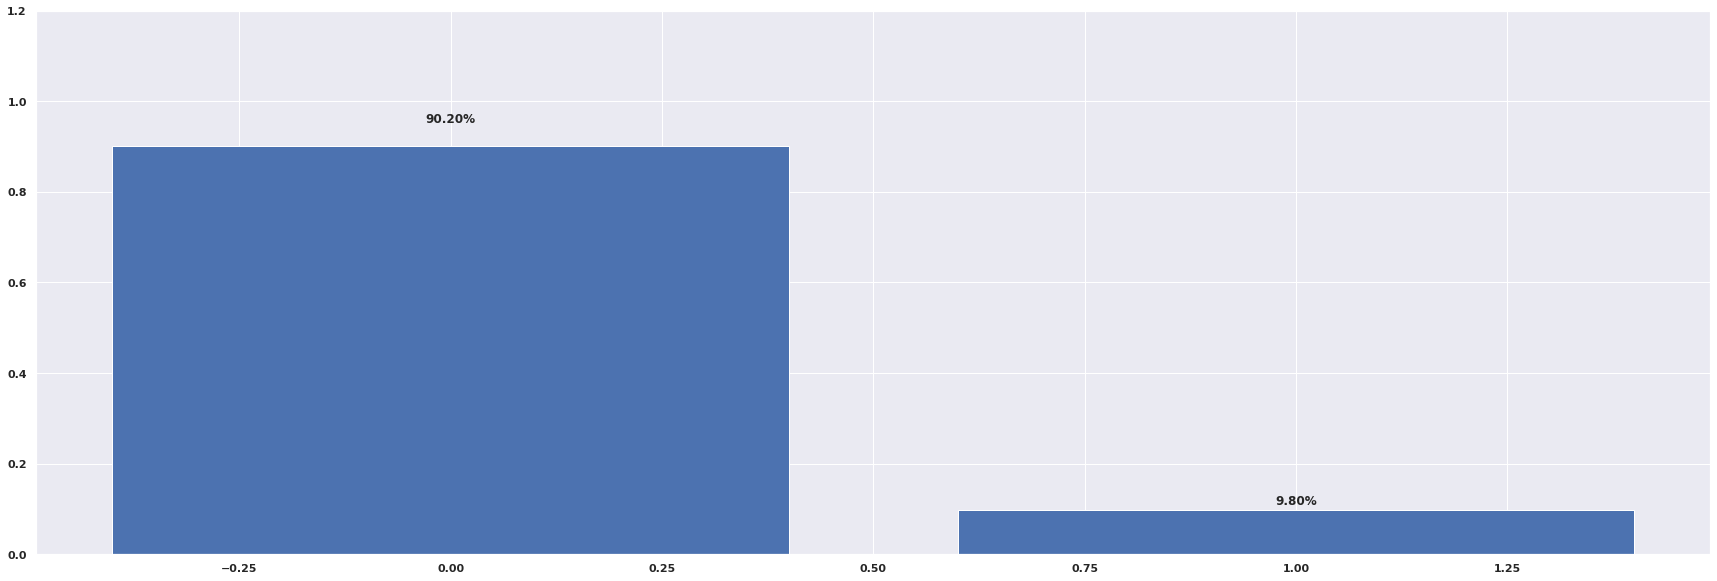

In [ ]:
counts = data\
  .iqr_outlier\
  .value_counts(normalize=True)\
  .reset_index()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2lf%%' % (round(height,3)*100),
                ha='center', va='bottom')

counts.columns = ['label','percentage']
fig, ax = plt.subplots()
rects = ax.bar(counts.label,counts.percentage)

ax.set_ylim(0.0,1.2)

autolabel(rects)

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


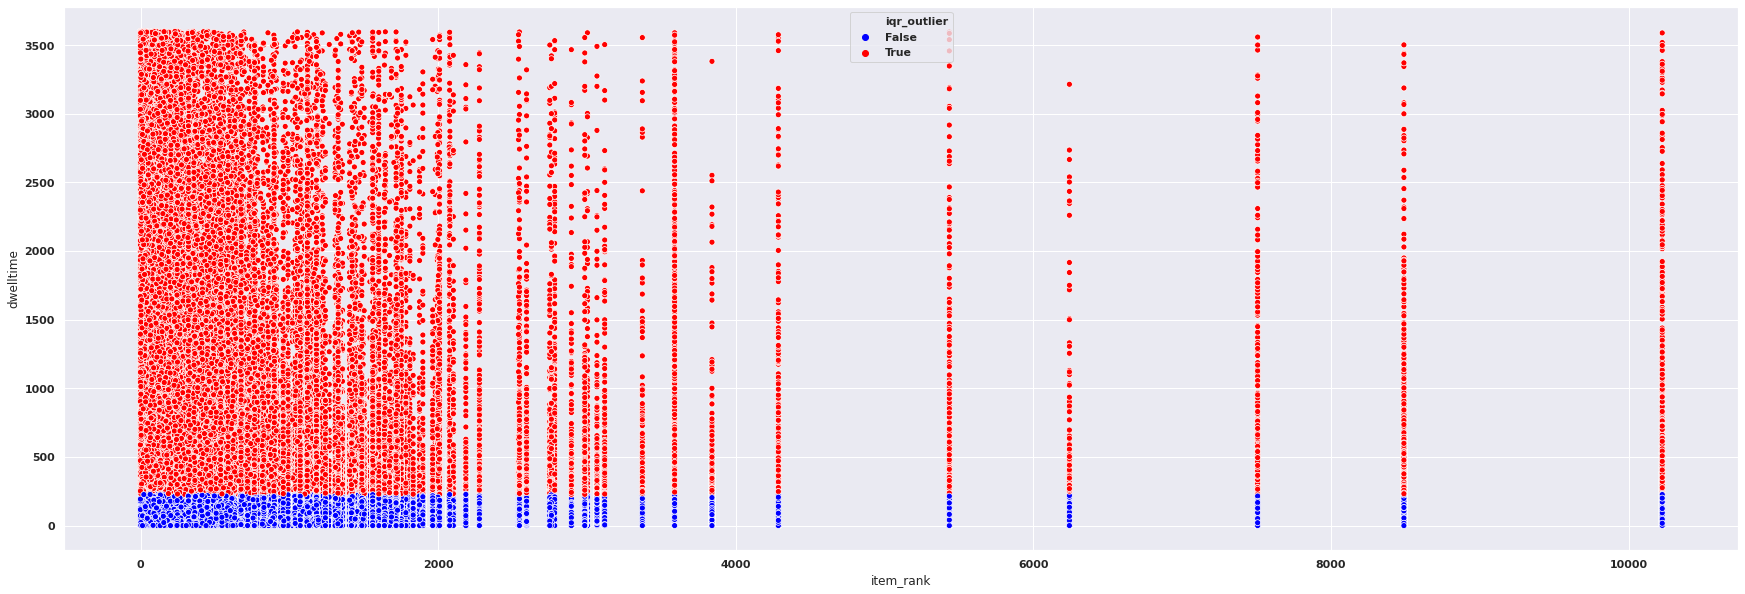

In [ ]:
import seaborn as sns

aux = data
sns.scatterplot(x='item_rank', y='dwelltime', hue="iqr_outlier",
              data=aux, palette=['blue','red'],
                   legend='full')
# g.set(xscale="log")